In [1]:
import json
import pandas as pd

In [2]:
with open("rackets_full.json", "r") as f:  
    data = json.load(f)
    

In [3]:
log_data_entries = data['log']['entries']
racquet_data = []

for ele in log_data_entries:
    text_response = ele['response']['content']['text']
    if text_response[:10] == '{"pcode":"':
        racquet_data.append(json.loads(text_response))



In [4]:
df = pd.DataFrame(racquet_data)
df.columns

Index(['pcode', 'mfg', 'racquet', 'headsize', 'length', 'weight', 'balance',
       'swingweight', 'flex', 'acor', 'sweet', 'rccode', 'current',
       'twistweight', 'hittingweight', 'vibration', 'filter', 'distance',
       'spin', 'angle', 'shotspeed', 'swingspeed', 'plow', 'time'],
      dtype='object')

In [5]:
df = df.drop_duplicates().reset_index()
df.head()

,index,pcode,mfg,racquet,headsize,length,weight,balance,swingweight,flex,...,hittingweight,vibration,filter,distance,spin,angle,shotspeed,swingspeed,plow,time
0,0,VS5,Volkl,V-Sense 5,100,27.0,276,33.5,281,70,...,114,164,21/2-effort,68.5,1596,3.6,64.5,51.4,37,0.89
1,1,U100UL,Wilson,Ultra 100UL,100,27.0,270,34.0,283,68,...,116,164,21/2-effort,68.5,1595,3.6,64.8,51.3,38,0.88
2,2,BULS1H,Wilson,Burn 100 ULS (2017),100,27.0,281,34.1,288,67,...,119,158,21/2-effort,68.2,1579,3.4,65.2,51.0,39,0.87
3,3,YEZLLG,Yonex,Ezone Lite,100,27.0,282,33.3,292,64,...,119,156,21/2-effort,68.1,1579,3.4,65.2,51.0,39,0.87
4,4,TPS270,Tecnifibre,T-Flash PS 270,100,27.0,285,34.1,293,69,...,119,160,21/2-effort,67.8,1570,3.5,64.9,50.7,39,0.87


In [6]:
normal_length_racquets = df[df['length']==27.0]
normal_length_racquets

,index,pcode,mfg,racquet,headsize,length,weight,balance,swingweight,flex,...,hittingweight,vibration,filter,distance,spin,angle,shotspeed,swingspeed,plow,time
0,0,VS5,Volkl,V-Sense 5,100,27.0,276,33.5,281,70,...,114,164,21/2-effort,68.5,1596,3.6,64.5,51.4,37,0.89
1,1,U100UL,Wilson,Ultra 100UL,100,27.0,270,34.0,283,68,...,116,164,21/2-effort,68.5,1595,3.6,64.8,51.3,38,0.88
2,2,BULS1H,Wilson,Burn 100 ULS (2017),100,27.0,281,34.1,288,67,...,119,158,21/2-effort,68.2,1579,3.4,65.2,51.0,39,0.87
3,3,YEZLLG,Yonex,Ezone Lite,100,27.0,282,33.3,292,64,...,119,156,21/2-effort,68.1,1579,3.4,65.2,51.0,39,0.87
4,4,TPS270,Tecnifibre,T-Flash PS 270,100,27.0,285,34.1,293,69,...,119,160,21/2-effort,67.8,1570,3.5,64.9,50.7,39,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,790,PT95,Prince,Tour 95,95,27.0,345,32.4,337,60,...,136,131,21/2-effort,65.8,1491,2.9,66.2,48.9,43,0.82
258,852,HG3RMP,Head,Graphene 360 Radical MP,98,27.0,312,32.4,324,68,...,130,152,21/2-effort,66.8,1526,3.1,66.0,49.7,42,0.84
260,938,HGTRMP,Head,Graphene Touch Radical MP,98,27.0,310,33.0,327,65,...,132,151,21/2-effort,66.6,1519,3.0,66.3,49.6,42,0.84
261,961,BS0398,Prince,Textreme Beast O3 98,98,27.0,318,32.5,326,69,...,133,155,21/2-effort,66.7,1519,2.9,66.5,49.6,42,0.83


In [7]:
df.corr('pearson')

,index,headsize,length,weight,balance,swingweight,flex,acor,sweet,twistweight,hittingweight
index,1.000000,-0.037387,0.109723,0.290374,-0.050027,0.523371,0.107339,0.561581,0.554929,0.289507,0.559557
headsize,-0.037387,1.000000,0.600280,-0.681726,0.737252,-0.261155,0.168528,0.008073,-0.048670,0.565842,0.003905
length,0.109723,0.600280,1.000000,-0.310789,0.516151,0.189963,0.149180,0.243743,0.190124,0.242250,0.242054
weight,0.290374,-0.681726,-0.310789,1.000000,-0.825035,0.680991,-0.221797,0.522982,0.529606,-0.099287,0.534820
balance,-0.050027,0.737252,0.516151,-0.825035,1.000000,-0.288224,0.267335,-0.110172,-0.150735,0.299982,-0.118649
swingweight,0.523371,-0.261155,0.189963,0.680991,-0.288224,1.000000,-0.137516,0.904457,0.884469,0.195792,0.911336
flex,0.107339,0.168528,0.149180,-0.221797,0.267335,-0.137516,1.000000,-0.053387,-0.001273,0.119537,-0.047643
acor,0.561581,0.008073,0.243743,0.522982,-0.110172,0.904457,-0.053387,1.000000,0.941788,0.566890,0.988878
sweet,0.554929,-0.048670,0.190124,0.529606,-0.150735,0.884469,-0.001273,0.941788,1.000000,0.471983,0.931853
twistweight,0.289507,0.565842,0.242250,-0.099287,0.299982,0.195792,0.119537,0.566890,0.471983,1.000000,0.573724


In [8]:
df.corr('spearman')

,index,headsize,length,weight,balance,swingweight,flex,acor,sweet,twistweight,hittingweight
index,1.000000,-0.084604,0.160383,0.423995,-0.144412,0.698475,0.034909,0.757733,0.730585,0.404505,0.752457
headsize,-0.084604,1.000000,0.451220,-0.660002,0.590697,-0.367554,0.263554,-0.075529,-0.142852,0.477025,-0.073748
length,0.160383,0.451220,1.000000,-0.246530,0.426457,0.144873,0.153765,0.266530,0.207601,0.266090,0.263022
weight,0.423995,-0.660002,-0.246530,1.000000,-0.806239,0.717815,-0.285443,0.534950,0.544694,-0.044706,0.543040
balance,-0.144412,0.590697,0.426457,-0.806239,1.000000,-0.365039,0.331151,-0.161886,-0.199010,0.196455,-0.167179
swingweight,0.698475,-0.367554,0.144873,0.717815,-0.365039,1.000000,-0.193815,0.882153,0.865996,0.199695,0.887874
flex,0.034909,0.263554,0.153765,-0.285443,0.331151,-0.193815,1.000000,-0.075021,-0.044763,0.165027,-0.068032
acor,0.757733,-0.075529,0.266530,0.534950,-0.161886,0.882153,-0.075021,1.000000,0.935995,0.585502,0.988531
sweet,0.730585,-0.142852,0.207601,0.544694,-0.199010,0.865996,-0.044763,0.935995,1.000000,0.493090,0.925905
twistweight,0.404505,0.477025,0.266090,-0.044706,0.196455,0.199695,0.165027,0.585502,0.493090,1.000000,0.588464


In [9]:
X = normal_length_racquets[['weight', 'balance']]#'length',
y = normal_length_racquets['swingweight']

# X_train_mean = X.mean()
# X_train_sd = X.std()

# y_train_mean = y.mean()
# y_train_sd = y.std()

# X = (X - X.mean())/X.std()
# y = (y - y.mean())/y.std()

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
print(pca.explained_variance_ratio_)



[9.99233358e-01 7.66642023e-04]


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


seaborn_data = pd.concat([X,y], axis=1)

/Users/niclasmettenleiter/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


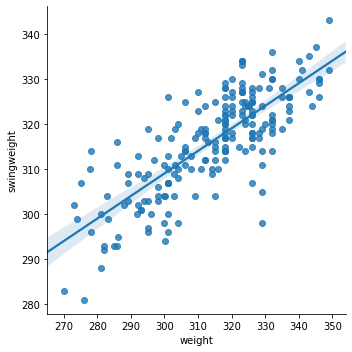

In [12]:
sns.lmplot(x="weight", 
           y="swingweight", 
           data=seaborn_data, x_jitter=.05);

In [13]:
#sns.lmplot(x="flex", y="swingweight", data=seaborn_data, x_jitter=.05);

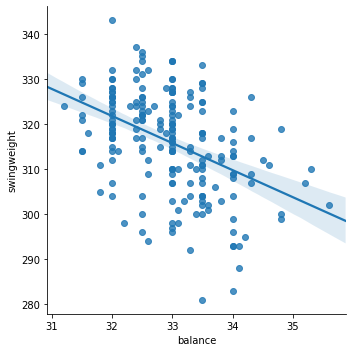

In [14]:
sns.lmplot(x="balance", y="swingweight", data=seaborn_data);

In [15]:
#sns.lmplot(x="length", y="swingweight", data=seaborn_data);

In [16]:
from sklearn import metrics
import numpy as np

def calculate_metrics(y_true, y_pred):
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    med_ae = metrics.median_absolute_error(y_true, y_pred)
#    mape = metrics.mean_absolute_percentage_error(y_true, y_pred)
    
    print("mean_absolute_error", mae)
    #print("mean_squared_error", mse)
    print("RMSE", np.sqrt(mse))
    print("median_absolute_error", med_ae)
    #print("mean_absolute_percentage_error", mape)
    
def calculate_mad(x):
    return np.median(np.absolute(x - np.median(x)))

def evaluate_model(model):
    model = model.fit(X_train, y_train)
    print("train_score", model.score(X_train, y_train))
    print("test_score", model.score(X_test, y_test))
    y_pred = model.predict(X_test)
    calculate_metrics(y_test, y_pred)
    difference = y_test-y_pred
    plt.hist(difference, bins=70)
#     print("mean of difference: ", np.mean(difference))
#     print("sd of difference: ", np.std(difference))
    
    med = np.median(difference)
    mad = calculate_mad(difference)
#     print("median of difference: ", med)
#     print("mean absolute difference: ", mad)
    
    lower = difference < med - 3 * mad
    upper = difference > med + 3 * mad
    
    print("outliers", len(df.loc[difference[lower].index]) + len(df.loc[difference[upper].index]))


    return model


def predict(model, flex, weight, balance):
    model = model.fit(X_train,y_train)
    sample = np.array([[ flex, weight, balance]])
    try:
        prediction = model.predict( np.array([[weight, balance,  flex]]))
    except:
        prediction = model.predict( np.array([[ weight, balance]]))
        
        
    return prediction

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_score 0.7315039732404407
test_score 0.6600530570905705
mean_absolute_error 4.588444294287863
RMSE 6.0151791377812005
median_absolute_error 3.5275369816390594
outliers 4


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

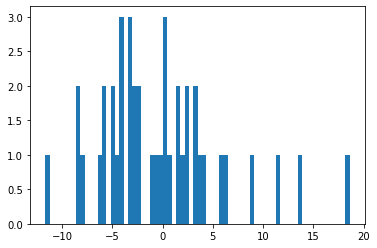

In [18]:
from sklearn.linear_model import LinearRegression,BayesianRidge
evaluate_model(LinearRegression())    


In [19]:
predict(LinearRegression(), 68, 357, 31.4)

array([338.44494011])

train_score 0.7314160208762612
test_score 0.6627695491433547
mean_absolute_error 4.562783261229203
RMSE 5.991097496417957
median_absolute_error 3.516029884772479
outliers 4


array([0.79877181, 7.74094202])

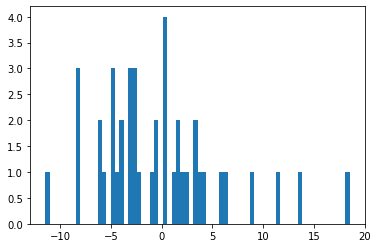

In [20]:
evaluate_model(BayesianRidge()).coef_    


In [21]:
predict(BayesianRidge(), 68, 357, 31.4)

array([338.42901766])

train_score 0.73146107346972
test_score 0.6621864257030663
mean_absolute_error 4.569390522812243
RMSE 5.996275024807323
median_absolute_error 3.5290650288274037
outliers 4


array([0.80049653, 7.80872346])

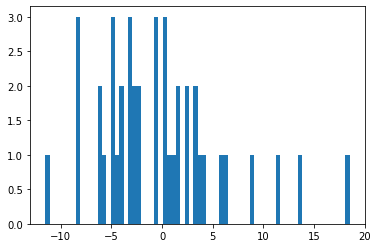

In [22]:
from sklearn.linear_model import ARDRegression
evaluate_model(ARDRegression(compute_score=True)).coef_    


In [23]:
def calculate_swingweight(weight, balance, flex=None):
    if flex is None:
        intercept = -190.784 #-190.78397629732342
        beta_1 =  0.8 # 0.79960292
        beta_2 = 7.763 #7.76294213
        return intercept + weight * beta_1 + balance * beta_2
    else:
        intercept = round(-188.75121065107402, 3)
        beta_1 = round(0.80260777, 3)
        beta_2 = round(8.23381858,3)
        beta_3 = round(-0.28220441,3)
        return intercept + weight * beta_1 + balance * beta_2 + flex * beta_3
calculate_swingweight(362, 31.7, 69)

343.49480000000005

In [24]:
calculate_swingweight(349,32)

336.832

train_score 0.731433119254426
test_score 0.6624993510593729
mean_absolute_error 4.565412298669379
RMSE 5.993497129869059
median_absolute_error 3.5172084728894504
outliers 4
[0.79960292 7.76294213]
-190.78397629732342


{'alphas': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': False,
 'scoring': None,
 'store_cv_values': False}

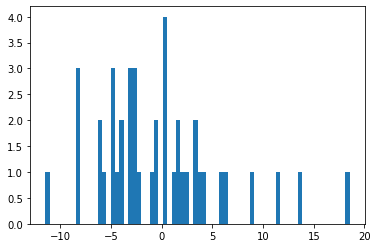

In [25]:
from sklearn.linear_model import RidgeCV, Ridge

ridge = evaluate_model(RidgeCV(alphas=[1e-4,1e-3, 1e-2, 1e-1, 1,10]))    
print(ridge.coef_)
print(ridge.intercept_)
ridge.get_params()

{'alpha': 1.727780074568463}
train_score 0.7312997072422128
test_score 0.6648720520563859
mean_absolute_error 4.549337396180168
RMSE 5.979067587410515
median_absolute_error 3.510003427801905
outliers 3


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f864d6fd210>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='explained_variance',
                   verbose=0)

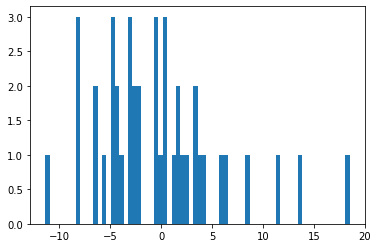

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

rng = 42
scoring = 'explained_variance'
#scoring = 'neg_mean_squared_error'
#scoring = 'neg_mean_absolute_error'
#scoring =  'neg_median_absolute_error'


distributions = dict(alpha=uniform(loc=0, scale=4))

search = RandomizedSearchCV(Ridge(), distributions,n_iter=100, random_state=rng, scoring=scoring).fit(X_train,y_train)
print(search.best_params_)
evaluate_model(search)

In [27]:
predict(RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]), 68, 357, 31.4)

array([338.43065017])

train_score 0.7306836086435715
test_score 0.6679292875581695
mean_absolute_error 4.511835674316478
RMSE 5.945087932309356
median_absolute_error 3.5199839659337613
outliers 3


array([0.78166199, 7.30009679])

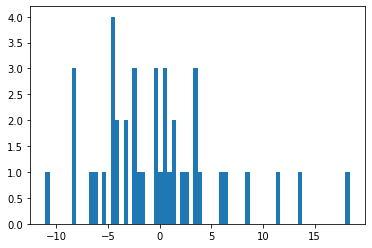

In [28]:
from sklearn.linear_model import ElasticNetCV
model = evaluate_model(ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], cv=5, random_state=0))    
model.coef_

In [29]:
predict(ElasticNetCV(cv=5, random_state=0), 68, 357, 31.4)

array([338.16132655])

train_score 0.6784909844115488
test_score 0.6689063988728943
mean_absolute_error 4.514000509804719
RMSE 5.936334838477504
median_absolute_error 3.2381406237336137
outliers 3


/Users/niclasmettenleiter/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=30000,
          random_state=42, tol=0.0001, verbose=0)

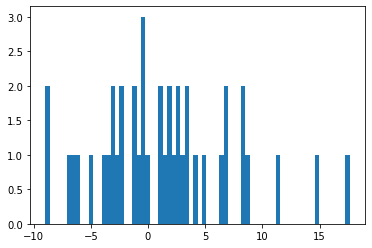

In [30]:
from sklearn import svm
evaluate_model(svm.LinearSVR(max_iter=30000, random_state=42))    


train_score 0.2672876603270222
test_score 0.17914589841327877
mean_absolute_error 7.031965386704838
RMSE 9.347080475991717
median_absolute_error 5.382177384124105
outliers 3


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='huber', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

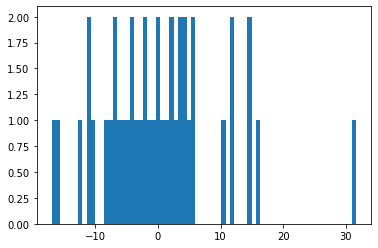

In [31]:
from sklearn.linear_model import SGDRegressor
evaluate_model(SGDRegressor(loss="huber",  random_state=42))    


train_score 0.6943064109004136
test_score 0.681644670982382
mean_absolute_error 4.476910564611552
RMSE 5.821019546138652
median_absolute_error 3.833749116580293
outliers 3


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=0.8),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=42)

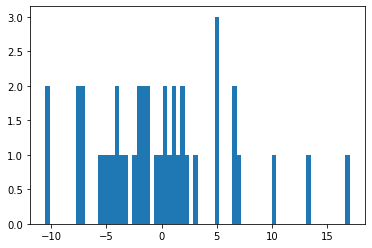

In [32]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel(noise_level=0.8)
evaluate_model(GaussianProcessRegressor(kernel=kernel, random_state=42))    


train_score 0.9168829757335794
test_score 0.38720014286335
mean_absolute_error 6.0303418803418785
RMSE 8.076111816536311
median_absolute_error 4.449999999999989
outliers 5


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

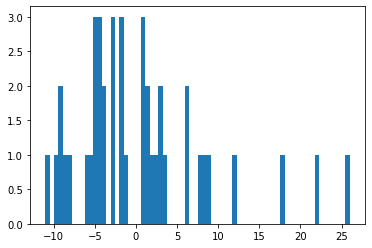

In [33]:
from sklearn import tree
evaluate_model(tree.DecisionTreeRegressor())    

train_score 0.7696436007480987
test_score 0.5417790969348322
mean_absolute_error 5.096385077870447
RMSE 6.9836174910239865
median_absolute_error 3.5330645161290306
outliers 5


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='square',
                  n_estimators=300, random_state=None)

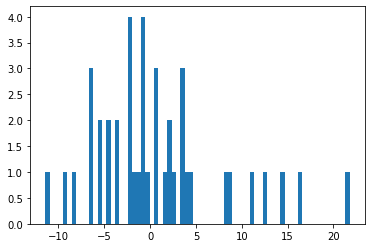

In [34]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestRegressor
evaluate_model(AdaBoostRegressor(n_estimators=300, loss="square"))    

In [35]:
predict(AdaBoostRegressor(n_estimators=300, loss="square"), 68, 357, 31.4)

array([343.])

In [36]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [37]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
# param_grid = {
#     "loss": ['ls', 'lad', 'huber', 'quantile'],
#     "learning_rate": [1e-4, 1e-3, 1e-2, 1e-1],
#     "n_estimators": randint(10,500),
#     "criterion": ['friedman_mse', 'mse'],
#     "min_samples_split": randint(2,5),
#     "min_samples_leaf": randint(1,4),
#     "max_depth": randint(1,5)
# }

# scoring = 'explained_variance'
# #scoring = 'neg_mean_squared_error'
# #scoring = 'neg_mean_absolute_error'
# #scoring =  'neg_median_absolute_error'

# clf = HalvingRandomSearchCV(
#     GradientBoostingRegressor(random_state=42),
#     param_grid,
#     factor=2,
#     n_jobs=4,
#     scoring='neg_mean_absolute_error'
# )
# evaluate_model(clf)    

train_score 0.8031703671201439
test_score 0.5836508083412602
mean_absolute_error 4.9943658737909224
RMSE 6.656897324663076
median_absolute_error 4.278350830078125
outliers 2


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=1,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

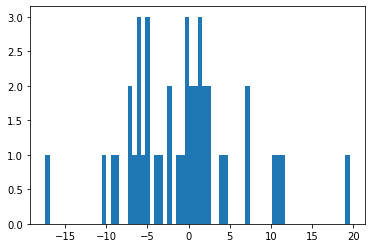

In [38]:
from xgboost import XGBRegressor
from scipy.stats import uniform

regr = XGBRegressor(random_state=42, n_estimators=100, max_depth=1)
evaluate_model(regr)

train_score 0.848056637657466
test_score 0.5576851029888883
mean_absolute_error 5.067754327257696
RMSE 6.861337446543927
median_absolute_error 3.7265546851841123
outliers 6


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

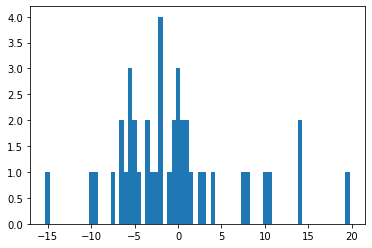

In [39]:
evaluate_model(GradientBoostingRegressor(
    loss="ls",
    n_estimators=40,
    random_state=42
))

In [40]:
predict(GradientBoostingRegressor(
    loss="ls",
    n_estimators=40,
    random_state=42
), 68, 357, 31.4)

array([332.78520357])

train_score 0.8892439512592054
test_score 0.5991475953318741
mean_absolute_error 4.778630952380949
RMSE 6.531835551331865
median_absolute_error 3.864375000000024
outliers 5


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

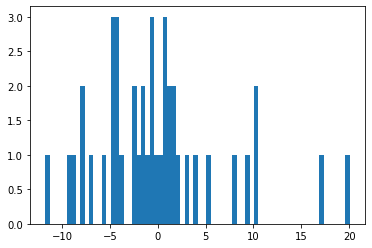

In [41]:
evaluate_model(RandomForestRegressor(
    n_estimators=400,
    criterion="mae",
    random_state=42))    

In [42]:
clf = RandomForestRegressor(
    n_estimators=400,
    criterion="mae",
    random_state=42).fit(X_train,y_train)
predict(RandomForestRegressor(
    n_estimators=400,
    criterion="mae",
    random_state=42), 68, 357, 31.4)

array([335.25125])

train_score 0.7306836086435715
test_score 0.6679292875581695
mean_absolute_error 4.511835674316478
RMSE 5.945087932309356
median_absolute_error 3.5199839659337613
outliers 3


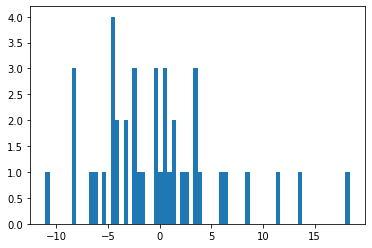

In [43]:
from sklearn.linear_model import LassoCV
las = evaluate_model(LassoCV()) 

In [44]:
%matplotlib inline


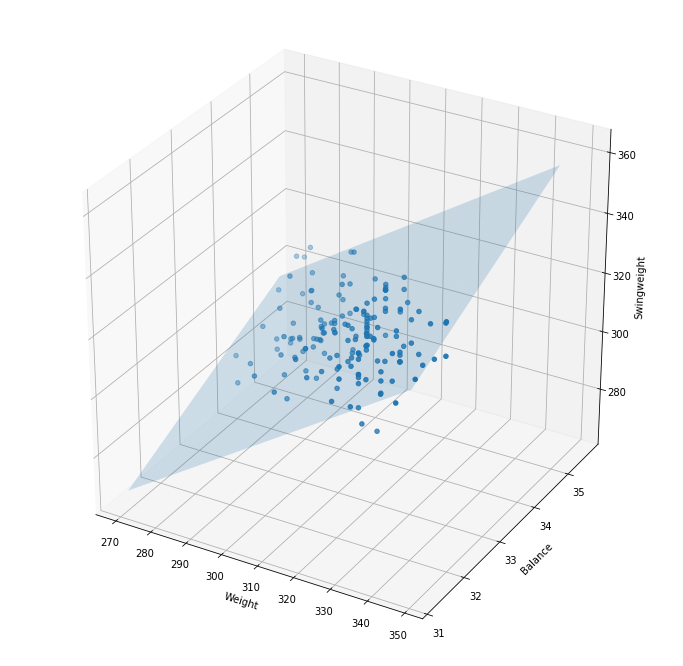

In [45]:
from mpl_toolkits.mplot3d import Axes3D

coefs = [ 0.79960292,  7.76294213 ]
intercept = -190.78397629732342
x_range = np.arange(X_train["weight"].min(), X_train["weight"].max())
y_range = np.arange(X_train["balance"].min(), X_train["balance"].max())

X, Y = np.meshgrid(x_range, y_range)
Z = X*coefs[0]+Y*coefs[1]+intercept

fig = plt.figure(figsize=plt.figaspect(1)*3)
ax = plt.axes(projection='3d')
ax.set_xlabel("Weight")
ax.set_ylabel("Balance")
ax.set_zlabel("Swingweight")

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha = 0.2)
ax.scatter(X_train["weight"], X_train["balance"], y_train, s=20)
